## Load the modules

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

import xarray as xr
import os
import glob

## get root directory

In [2]:
cwd = os.getcwd()

In [3]:
cwd

'/Users/ekoehn/Documents/phd/teaching/IPO2021/ex5'

## Run the Shallow Water Model

In [4]:
# create output folder
if os.path.isdir('swm_output')==False:
    os.mkdir('swm_output')
os.chdir(cwd)
os.chdir('swm')

# Run the model
exec(open('swm_run.py').read())
os.chdir(cwd)
os.chdir('swm_output')

# Load the model output
runlist = sorted(glob.glob('run*'))
os.chdir(runlist[-1])
etafn = xr.open_dataset('eta.nc')
ufn = xr.open_dataset('u.nc')
vfn = xr.open_dataset('v.nc')
os.chdir(cwd)

Starting shallow water model run 0 on Wed May 26 16:23:41 2021
Model integration will take approximately 11.58s, 
and is hopefully done on Wed May 26 16:23:53 2021
Integration done in 8.78s on Wed May 26 16:23:50 2021


## Set up the model output visualization

In [5]:
def set_up_animation():
    res = 1
    m = 15
    xx_u,yy_v = np.meshgrid(param['x_u']/1000.,param['y_v']/1000.)

    fig,ax = plt.subplots(1,3,figsize=(13.5,5))
    leta, = ax[1].plot([], [], 'C0',linewidth=2)
    lu, = ax[2].plot([], [], 'k',linewidth=2,label='Zonal')
    lv, = ax[2].plot([], [], 'r',linewidth=2,label='meridional')
    ttext = ax[1].text(param['Lx']/2./1000.,-0.15,'')
    plt.tight_layout()

    def init():
        ax[0].set_xlim([0, param['Lx']/1000.])
        ax[0].set_ylim([param['y_T'][1]/1000., param['Ly']/1000.])  
        ax[0].set_xlabel(r'Zonal distance in km')
        ax[1].set_xlabel(r'Zonal distance in km')
        ax[2].set_xlabel(r'Zonal distance in km')
        ax[0].set_ylabel(r'Meridional distance in km')
        ax[1].set_ylabel(r'Surface displacement in m')
        ax[2].set_ylabel(r'Zonal velocity (black), meridional velocity (red) in m/s')

        ax[0].axhline(param['y_T'][int(ufn.u.shape[-2]/2)]/1000.,color='C2',linewidth=3)
        ax[1].set_xlim(0, param['Lx']/1000.)
        ax[1].set_ylim(-.2, .2)
        ax[2].set_xlim(0, param['Lx']/1000.)
        ax[2].set_ylim(-0.015, 0.015)
        ax[2].legend()
        ax[1].set_title('Surface displacement (along green line)')
        ax[2].set_title('u and v velocity (along green line)')
        return 

    # animation function
    def animate(i): 
        if np.mod(i,10)==0:
            print(str(i)+' of '+str(Nt))
        #print(i,res)
        x = param['x_T']/1000.
        y = param['y_T']/1000.
        z = etafn.eta[int(res*i),:,:]
        cont = ax[0].contourf(x, y, z, 25,cmap='seismic',levels=np.linspace(-.1,.1,21))
        ax[0].quiver(xx_u[::m,::m],yy_v[::m,::m], ufn.u[res*i,::m,1::m], vfn.v[res*i,1::m,::m],scale=.1)
        leta.set_data(x, z[int(z.shape[-1]/2),:])
        lu.set_data(x[1:], ufn.u[res*i,int(ufn.u.shape[-2]/2),:])
        lv.set_data(x[:], vfn.v[res*i,int(vfn.v.shape[-2]/2),:])
        ttext.set_text('t = {:2.2f} hours'.format(etafn.t.values[i]/3600.))
        if i == 0:
            plt.colorbar(cont,ax=ax[0])
        if res*(i+1)*param['output_dt'] < param['Lx']/np.sqrt(param['g']*param['H'])/2.:
            ax[0].set_title('Surface displacement (color in m) \n Water velocity (arrows) \n Eastward wind Forcing: On')#t = %1.2e' % t[i] )
        else:
            ax[0].set_title('Surface displacement (color in m) \n Water velocity (arrows) \n Eastward wind forcing: Off')#t = %1.2e' % t[i] )
        plt.tight_layout()
        return cont

    Nt = int(np.shape(etafn.eta)[0]/res)
    print('Wait a moment. This can take a minute...')
    print('Frames:')
    anim = animation.FuncAnimation(fig, animate, frames=Nt, init_func=init)
    return anim
    #anim.save('animation.mp4',writer=animation.FFMpegWriter())


## Animate Output (below the animation the last frame of the animation is again shown in a fixed image)

Wait a moment. This can take a minute...
Frames:
0 of 65
10 of 65
20 of 65
30 of 65
40 of 65
50 of 65
60 of 65


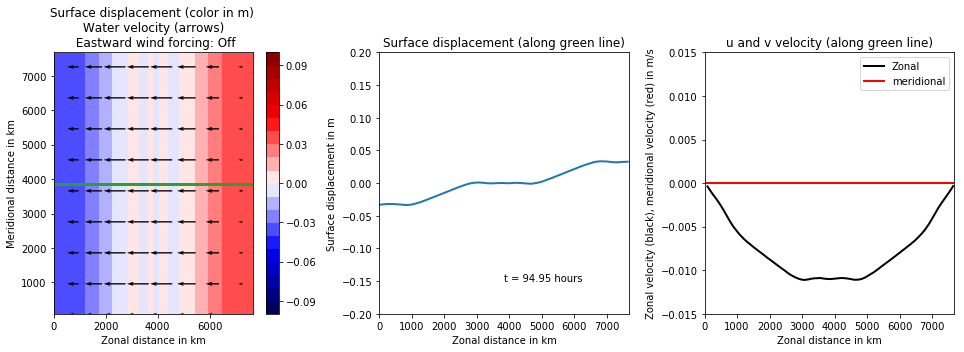

In [6]:
anim = set_up_animation()
HTML(anim.to_html5_video())

## d) Now turn on Earth's rotation (f-plane)
## Therefore, open the file swm_param.py in the folder "swm". Double click on the "swm_param.py" file to open it. 
## In the file, change the coriolis parameter by setting in lines 24/25 (by inserting/removing the "#" symbol):
## param['coriolis'] = 'f plane' 
## This will change the Coriolis parameter f from 0 to be the same value everywhere in the basin: f = 2$\Omega$ sin(30°).
## Make sure that you save the changes in the file "swm_param.py" before closing it!!!
## Then, just repeat the calculation from above (already implemented below).

In [7]:
cwd = os.getcwd()

In [8]:
cwd

'/Users/ekoehn/Documents/phd/teaching/IPO2021/ex5'

In [9]:
# create output folder
if os.path.isdir('swm_output')==False:
    os.mkdir('swm_output')
os.chdir(cwd)
os.chdir('swm')

# Run the model
exec(open('swm_run.py').read())
os.chdir(cwd)
os.chdir('swm_output')

# Load the model output
runlist = sorted(glob.glob('run*'))
os.chdir(runlist[-1])
etafn = xr.open_dataset('eta.nc')
ufn = xr.open_dataset('u.nc')
vfn = xr.open_dataset('v.nc')
os.chdir(cwd)

Starting shallow water model run 1 on Wed May 26 16:25:34 2021
Model integration will take approximately 8.55s, 
and is hopefully done on Wed May 26 16:25:42 2021
Integration done in 8.21s on Wed May 26 16:25:42 2021


Wait a moment. This can take a minute...
Frames:
0 of 65
10 of 65
20 of 65
30 of 65
40 of 65
50 of 65
60 of 65


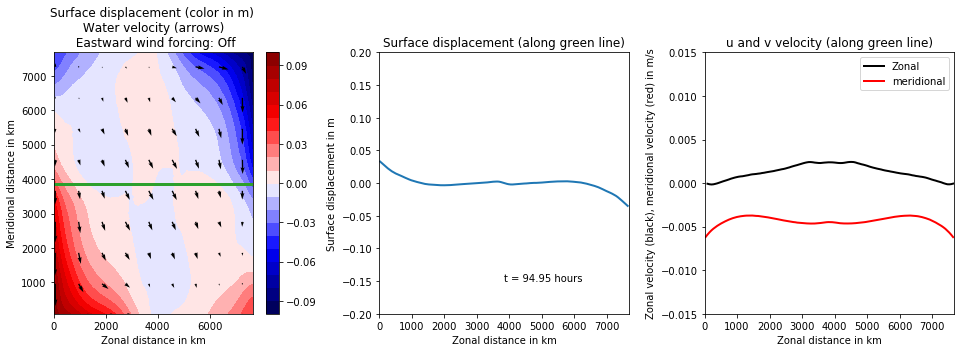

In [10]:
anim = set_up_animation()
HTML(anim.to_html5_video())